In [1]:
!pip install prophet

In [35]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet
from matplotlib.ticker import FuncFormatter


In [36]:
# Read BTC csv into DataFrame
# Source: https://www.kaggle.com/datasets/saswattulo/bitcoin-price-history-btc-usd
btc_prices_df = pd.read_csv('Resources/BTC_Prices.csv', index_col='Date', parse_dates=True).dropna()
btc_prices_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


# New Section

In [37]:
# Read ETH csv into DataFrame and sorting. The dates were desc by default. Converting [Open] to float so it can be used later.
# Source: https://www.investing.com/crypto/ethereum/historical-data
eth_prices_df = pd.read_csv('Resources/Ethereum Historical Data .csv', index_col='Date', parse_dates=True).dropna()
eth_prices_df.sort_values(by='Date', ascending=True)
eth_prices_df.head()


,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2024-05-06,"3,062.03","3,136.40","3,220.04","3,048.65",377.37K,-2.37%
2024-05-05,"3,136.40","3,117.14","3,170.63","3,074.55",229.16K,0.62%
2024-05-04,"3,117.23","3,102.25","3,146.74","3,095.58",205.59K,0.48%
2024-05-03,"3,102.25","2,987.11","3,125.81","2,958.98",381.95K,3.85%
2024-05-02,"2,987.12","2,973.30","3,014.55","2,897.11",387.64K,0.47%


In [38]:
print(eth_prices_df.dtypes)

Price       object
Open        object
High        object
Low         object
Vol.        object
Change %    object
dtype: object


In [39]:
#Changing columns to floats so we can use them for analysis
eth_prices_df['Open'] = eth_prices_df['Open'].apply(lambda x: float(x.replace(',','')) if x.strip() else None)
eth_prices_df['Change %'] = eth_prices_df['Change %'].str.replace('%', '').astype(float) / 100
print(eth_prices_df.dtypes)

Price        object
Open        float64
High         object
Low          object
Vol.         object
Change %    float64
dtype: object


In [40]:
#Creating a 'Change %' Column for the BTC data.
btc_prices_df['Change %'] = btc_prices_df['Close'].pct_change()
btc_prices_df.head()

,Open,High,Low,Close,Adj Close,Volume,Change %
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-0.071926
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-0.069843
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.035735
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-0.024659


In [41]:
#Creating some new dataframes that I can use for analysis
btc_open_prices_df = btc_prices_df['Open'].copy()
btc_changepct_df = btc_prices_df['Change %'].copy()
eth_open_prices_df = eth_prices_df['Open'].astype(float).copy()
eth_changepct_df = eth_prices_df['Change %'].copy()

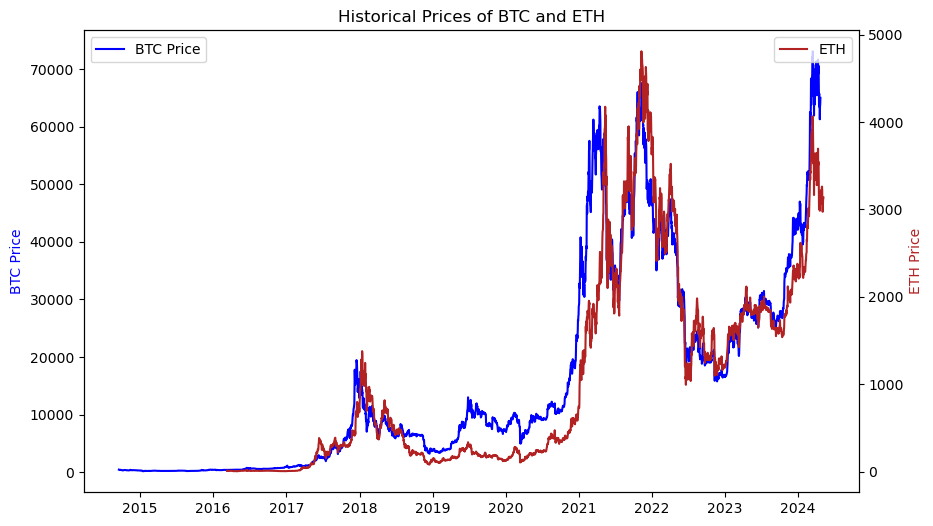

In [46]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting Historical BTC and ETH data. We're scaling ETH to match the relative price of BTC so the comparison is more meaningfull.
ax1.plot(btc_open_prices_df, label='BTC Price', color='blue')
ax1.set_ylabel('BTC Price', color='blue')

ax2 = ax1.twinx()
ax2.plot(eth_open_prices_df, label='ETH', color='firebrick')
ax2.set_ylabel('ETH Price', color='firebrick')


plt.title('Historical Prices of BTC and ETH')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

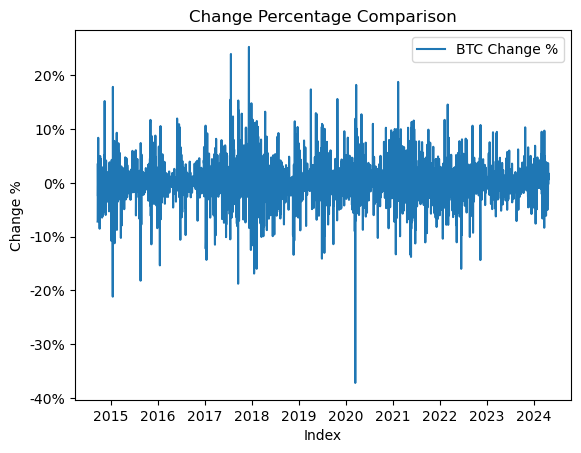

In [43]:
plt.plot(btc_changepct_df, label='BTC Change %')
formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y))
formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Change %')
plt.title('Change Percentage Comparison')
plt.legend()


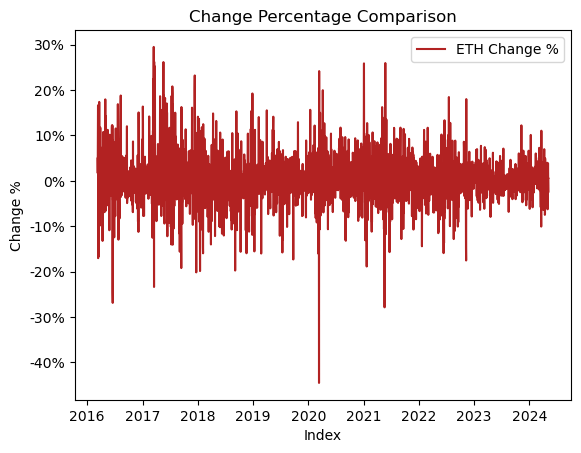

In [45]:
# Plot change percent for ETH
plt.plot(eth_changepct_df, label='ETH Change %', color ='firebrick')

#Formating the y-axis for readability
formatter = FuncFormatter(lambda y, _: '{:.0%}'.format(y))
plt.gca().yaxis.set_major_formatter(formatter)

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Change %')
plt.title('Change Percentage Comparison')
plt.legend()

# Show plot
plt.show()

In [53]:
#Change %
print(f"Max single day ETH gain, {eth_prices_df['Change %'].max()}")
print(f"Max single day ETH loss, {eth_prices_df['Change %'].min()}")
print(f"Max single day BTC gain, {btc_prices_df['Change %'].max()}")
print(f"Max single day BTC loss, {btc_prices_df['Change %'].min()}")

Max single day ETH gain, 0.29510000000000003
Max single day ETH loss, -0.44549999999999995
Max single day BTC gain, 0.2524716942763181
Max single day BTC loss, -0.37169538560117077


In [47]:
#Checking the Coorelation between BTC and ETH prices
btc_open_prices_df.corr(eth_open_prices_df)

0.9414344178538598

In [48]:
#Checking the Coorelation between BTC and ETH change percents
btc_changepct_df.corr(eth_changepct_df)

0.6499454098650331

In [27]:
# Label the columns ds and y so that the syntax is recognized by Prophet
btc_prices_df.reset_index(drop=False, inplace=True)

btc_prices_df.rename(columns={'Date':'ds','Close':'y'}, inplace=True)

# Drop an NaN values from the prophet_df DataFrame
btc_prices_df.dropna()

btc_prices_df

,index,ds,Open,High,Low,y,Adj Close,Volume,Change %
0,0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN
1,1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,-0.071926
2,2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,-0.069843
3,3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,0.035735
4,4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,-0.024659
...,...,...,...,...,...,...,...,...,...
3500,3500,2024-04-17,63831.847656,64486.363281,59768.585938,61276.691406,61276.691406,41915247049,-0.039729
3501,3501,2024-04-18,61275.316406,64125.687500,60833.480469,63512.753906,63512.753906,36006307335,0.036491
3502,3502,2024-04-19,63510.750000,65481.597656,59651.390625,63843.570312,63843.570312,49920425401,0.005209
3503,3503,2024-04-20,63851.101562,65442.457031,63172.402344,64994.441406,64994.441406,23097485495,0.018026


In [28]:
# Make predictions
btc_model = Prophet()

# Fit the time-series model.
btc_model.fit(btc_prices_df)

19:32:07 - cmdstanpy - INFO - Chain [1] start processing
19:32:09 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
# Create a future dataframe to hold predictions
# Make the prediction go out 90 days
btc_future = btc_model.make_future_dataframe(periods = 90, freq = 'd')

# View the last five rows of the nasdaq_forecast DataFrame
btc_future.tail(5)

,ds
3590,2024-07-16
3591,2024-07-17
3592,2024-07-18
3593,2024-07-19
3594,2024-07-20


In [30]:
# Make the predictions for the BTC data
btc_forecast = btc_model.predict(btc_future)

# Display the first five rows of the nasdaq_forecast DataFrame
btc_forecast.head(5)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-17,171.428312,-10564.220714,4423.554309,171.428312,171.428312,-2944.481601,-2944.481601,-2944.481601,44.778365,44.778365,44.778365,-2989.259966,-2989.259966,-2989.259966,0.0,0.0,0.0,-2773.053289
1,2014-09-18,171.660469,-10498.258419,4204.140563,171.660469,171.660469,-3036.299816,-3036.299816,-3036.299816,-11.550482,-11.550482,-11.550482,-3024.749334,-3024.749334,-3024.749334,0.0,0.0,0.0,-2864.639347
2,2014-09-19,171.892626,-10252.157219,4140.926433,171.892626,171.892626,-3070.692536,-3070.692536,-3070.692536,-11.428461,-11.428461,-11.428461,-3059.264074,-3059.264074,-3059.264074,0.0,0.0,0.0,-2898.799910
3,2014-09-20,172.124783,-9971.596932,4469.731251,172.124783,172.124783,-3104.364678,-3104.364678,-3104.364678,-11.847810,-11.847810,-11.847810,-3092.516868,-3092.516868,-3092.516868,0.0,0.0,0.0,-2932.239896
4,2014-09-21,172.356939,-9853.358849,4716.989699,172.356939,172.356939,-3121.539203,-3121.539203,-3121.539203,2.586828,2.586828,2.586828,-3124.126031,-3124.126031,-3124.126031,0.0,0.0,0.0,-2949.182263


D:\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


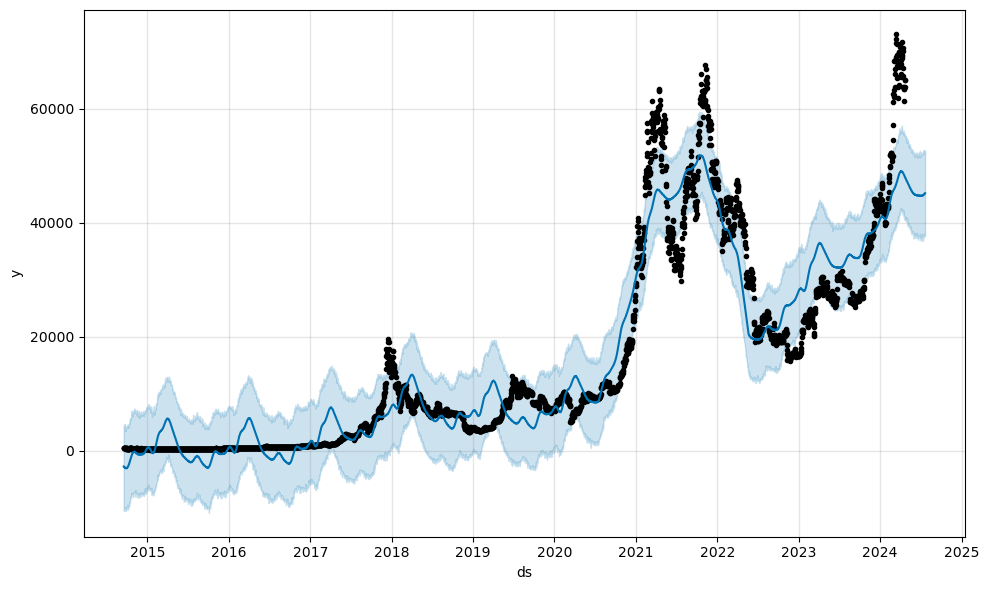

In [31]:
# Plot the Prophet predictions for the BTC data
fig = btc_model.plot(btc_forecast)

<Axes: >

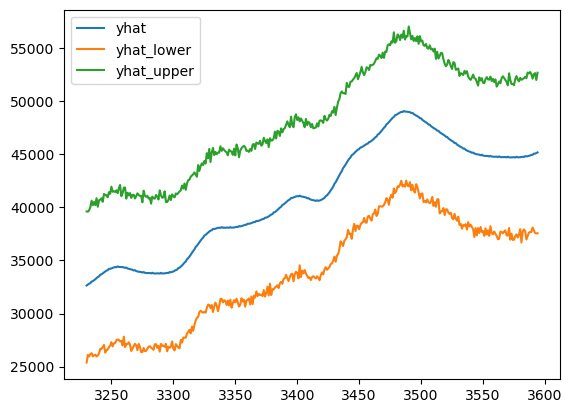

In [54]:
# From the btc_forecast DataFrame, plot the data to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 90 days
btc_forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-365:,:].plot()

D:\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
D:\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
D:\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].d

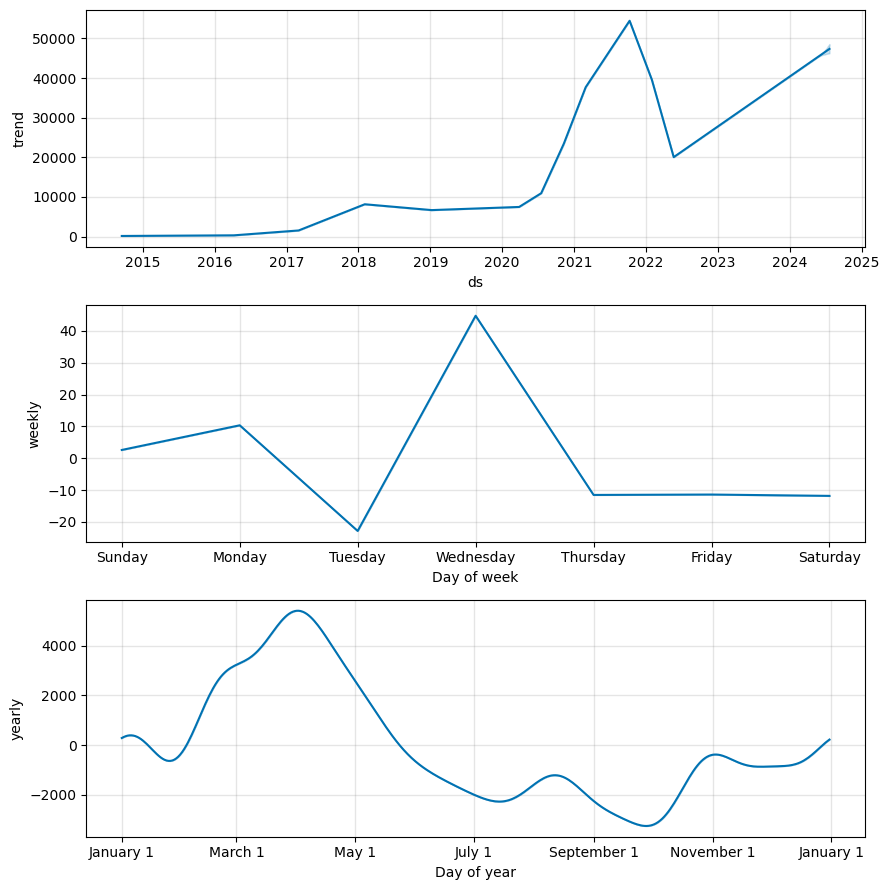

In [33]:
# Use the plot_components function to visualize the forecast results
# for the btc_forecast DataFrame
fig2 = btc_model.plot_components(btc_forecast)